# CPSC 330 - Applied Machine Learning 

## Homework 5: Evaluation metrics
### Associated lectures: [Lectures 9, 10](https://ubc-cs.github.io/cpsc330/README.html) 

**Due date: Monday, Feb 27, 2023 at 11:59pm**

## Imports

In [1]:
import os
import re
import sys
from hashlib import sha1

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.compose import make_column_transformer
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    make_scorer,
    precision_score,
    recall_score,
)
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

## Instructions 
<hr>
rubric={points:3}

Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2022W2/blob/main/docs/homework_instructions.md). 

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 2. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).

<br><br>

## Exercise 1: Precision, recall, and f1 score by hand <a name="1"></a>
<hr>

Consider the problem of predicting whether a patient has cancer or not. It is important to catch this disease early to reduce mortality rate; late diagnosis will result in metastasis to other organs, which adversely impacts patient's prognosis. Below are confusion matrices of two machine learning models: Model A and Model B. 

- Model A

|         | Predicted disease | Predicted no disease |
| :------------- | -----------------------: | -----------------------: |
| **Actual disease**       | 48 | 32 |
| **Actual no disease**       | 20 | 100 |


- Model B

|        | Predicted disease | Predicted no disease |
| :------------- | -----------------------: | -----------------------: |
| **Actual disease**       | 43 | 22 |
| **Actual no disease**       | 35 | 100 |
- 
|        | Predicted disease | Predicted no disease |
| :------------- | -----------------------: | -----------------------: |
| **Actual disease**       | TP | FN |
| **Actual no disease**       | FP | TN |

### 1.1 Positive vs. negative class 
rubric={points:2}

**Your tasks:**

Precision, recall, and f1 score depend upon which class is considered "positive", that is the thing you wish to find. In the example above, which class is likely to be the "positive" class? Why? 

**Answer:** Because in the above problem, it is important to "catch this disease early", we are trying to spot patients ***with cancer***, and therefore the positive class is ***Predicted Disease***

<br><br>

### 1.2 Accuracy
rubric={points:2}

**Your tasks:**

Calculate accuracies for Model A and Model B. 

We'll store all metrics associated with Model A and Model B in the `results_dict` below. 

In [2]:
results_dict = {"A": {}, "B": {}}

In [3]:
results_dict["A"]["accuracy"] = (48 + 100) / (48 + 100 + 32 + 20)
results_dict["B"]["accuracy"] = (43 + 100) / (43 + 22 + 35 + 100)
print(f'Model A\'s accuracy: {results_dict["A"]["accuracy"]}')
print(f'Model B\'s accuracy: {results_dict["B"]["accuracy"]}')

Model A's accuracy: 0.74
Model B's accuracy: 0.715


<br><br>

### 1.3 Which model would you pick? 
rubric={points:1}

**Your tasks:**

Which model would you pick simply based on the accuracy metric? 

**Answer:** Simply based on accuracy, I would pick ***Model A*** because the accuracy of its predictions is higher.

<br><br>

### 1.4 Precision, recall, f1-score
rubric={points:6}

**Your tasks:**

1. Calculate precision, recall, f1-score for Model A and Model B manually, without using `scikit-learn` tools. 


In [4]:
results_dict["A"]["precision"] = 48/ (48 + 20)
results_dict["B"]["precision"] = 43 / (43 + 35)
results_dict["A"]["recall"] = 48 / (48 + 32)
results_dict["B"]["recall"] = 43 / (43 + 22)
results_dict["A"]["f1"] = 2 * (results_dict["A"]["precision"] * results_dict["A"]["recall"]) / (results_dict["A"]["precision"] + results_dict["A"]["recall"])
results_dict["B"]["f1"] = 2 * (results_dict["B"]["precision"] * results_dict["B"]["recall"]) / (results_dict["B"]["precision"] + results_dict["B"]["recall"])


Show the dataframe with all results. 

In [5]:
pd.DataFrame(results_dict)

,A,B
accuracy,0.740000,0.715000
precision,0.705882,0.551282
recall,0.600000,0.661538
f1,0.648649,0.601399


<br><br>

### 1.5 Discussion
rubric={points:4}

**Your tasks:**
1. Given the type of problem (early cancer diagnosis), which metric is more informative in this problem? Why? 
2. Which model would you pick based on this information? 

1. **Answer:** Given the type of problem is early cancer diagnosis, and it would be better for the patient to be predicted to have cancer and actually not have cancer (FP) rather than the opposite, recall would be the more informative metric. We want to identify as many people that actualy have cancer as possible.

2. **Answer:** I would pick ***Model B*** based on this information for its higher recall score

<br><br>

### (Optional) 1.6 
rubric={points:1}

**Your tasks:**

Provide 2 to 3 example classification datasets (with links) where accuracy metric would be misleading. Discuss which evaluation metric would be more appropriate for each dataset. You may consider datasets we have used in this course so far. You could also look up datasets on Kaggle. 

1. [Random Sample of NIH Chest X-ray Dataset](https://www.kaggle.com/datasets/nih-chest-xrays/sample): Predicts disease classification based on chest x-ray. Imbalanced classes with a majority of x-rays having `No Finding` classification. A better evaluation metric may be recall since it would favor the patient to correctly identify disease.

2. [EMNIST (Extended MNIST)](https://www.kaggle.com/datasets/crawford/emnist?select=emnist-byclass-train.csv): 28x28 pixel images mapping to handwritten characters. In the ByClass dataset, there is a significant imbalance towards lower value numerical characters. Precision of each character may be a better measurement than overall accuracy because a model being able to identify one character consistently, but not other (more infrequent) characters, may have a high accuracy, but poor performance.

<br><br><br><br>

### Exercise 2: Classification evaluation metrics using `sklearn` <a name="2"></a>
<hr>

In general, when a dataset is imbalanced, accuracy does not provide the whole story. In class, we looked at credit card fraud dataset which is a classic example of an imbalanced dataset. 

Another example is customer churn datasets. [Customer churn](https://en.wikipedia.org/wiki/Customer_attrition) refers to the notion of customers leaving a subscription service like Netflix. In this exercise, we will try to predict customer churn in a dataset where most of the customers stay with the service and a small minority cancel their subscription. To start, please download the [Kaggle telecom customer churn dataset](https://www.kaggle.com/becksddf/churn-in-telecoms-dataset). Once you have the data, you should be able to run the following code:

The starter code below reads the data CSV as a pandas dataframe and splits it into 70% train and 30% test. 

Note that `churn` column in the dataset is the target. "True" means the customer left the subscription (churned) and "False" means they stayed.

> Note that for this kind of problem a more appropriate technique is something called survival analysis and we'll be talking about it later in the course. For now, we'll just treat it as a binary classification problem. 

In [6]:
df = pd.read_csv("bigml_59c28831336c6604c800002a.csv", encoding="utf-8")
train_df, test_df = train_test_split(df, test_size=0.3, random_state=123)
train_df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
1402,NE,70,415,421-8535,no,no,0,213.4,86,36.28,...,77,17.40,256.6,101,11.55,5.7,4,1.54,1,False
1855,WI,67,510,417-2265,no,no,0,109.1,134,18.55,...,76,12.10,91.2,86,4.10,10.9,5,2.94,2,False
633,NJ,122,415,327-9341,no,yes,34,146.4,104,24.89,...,103,7.62,220.0,91,9.90,15.6,4,4.21,2,False
1483,NV,107,510,419-9688,yes,no,0,234.1,91,39.80,...,105,13.86,282.5,100,12.71,10.0,3,2.70,1,False
2638,HI,105,510,364-8128,no,no,0,125.4,116,21.32,...,95,22.23,241.6,104,10.87,11.4,9,3.08,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2154,WY,126,408,339-9798,yes,no,0,197.6,126,33.59,...,112,20.95,285.3,104,12.84,12.5,8,3.38,2,False
3089,WV,70,510,348-3777,no,yes,30,143.4,72,24.38,...,92,14.45,127.9,68,5.76,9.4,4,2.54,3,False
1766,NJ,125,415,406-6400,no,no,0,182.3,64,30.99,...,121,11.88,171.6,96,7.72,11.6,7,3.13,2,False
1122,NE,159,415,362-5111,no,no,0,189.1,105,32.15,...,147,20.92,242.0,106,10.89,10.4,5,2.81,1,True


<br><br>

### 2.1 Distribution of target values
rubric={points:4}

**Your tasks:**

Examine the distribution of target values in the train split. Do you see class imbalance? If yes, do we need to deal with it? Why or why not? 

**ANSWER:**
>  `churn` is a binary class with  `False` in $1984/2333$ examples. It is also our target class.

We need to deal with these class imbalances such as to not overemphasize certain target classes. This is especially important since the `churn` class has an imbalance towards `False`, while the `True` prediction may be more significant since we would like to find cases in which customers <ins>left</ins> the subscription.

In [7]:
pd.set_option('display.max_columns', None)
train_df.describe(include="all")

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
count,2333,2333.000000,2333.000000,2333,2333,2333,2333.000000,2333.000000,2333.000000,2333.000000,2333.000000,2333.000000,2333.000000,2333.000000,2333.000000,2333.000000,2333.000000,2333.000000,2333.000000,2333.000000,2333
unique,51,NaN,NaN,2333,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,WV,NaN,NaN,421-8535,no,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,70,NaN,NaN,1,2106,1695,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1984
mean,NaN,100.434634,436.324046,NaN,NaN,NaN,8.028290,179.655679,100.567081,30.542015,201.175782,99.885555,17.100210,201.211745,99.988856,9.054591,10.269567,4.503215,2.773365,1.551650,NaN
std,NaN,39.642470,41.854200,NaN,NaN,NaN,13.665229,54.546284,20.202414,9.272847,50.449386,19.788878,4.288194,50.888058,19.406455,2.290012,2.777601,2.507555,0.749929,1.328702,NaN
min,NaN,1.000000,408.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,73.000000,408.000000,NaN,NaN,NaN,0.000000,143.400000,87.000000,24.380000,167.300000,87.000000,14.220000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000,NaN
50%,NaN,100.000000,415.000000,NaN,NaN,NaN,0.000000,179.200000,101.000000,30.460000,202.400000,100.000000,17.200000,201.600000,100.000000,9.070000,10.400000,4.000000,2.810000,1.000000,NaN
75%,NaN,127.000000,415.000000,NaN,NaN,NaN,19.000000,216.300000,114.000000,36.770000,236.000000,113.000000,20.060000,236.600000,113.000000,10.650000,12.100000,6.000000,3.270000,2.000000,NaN


In [8]:
print(train_df.shape)
train_df.info()

(2333, 21)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2333 entries, 1402 to 1346
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   2333 non-null   object 
 1   account length          2333 non-null   int64  
 2   area code               2333 non-null   int64  
 3   phone number            2333 non-null   object 
 4   international plan      2333 non-null   object 
 5   voice mail plan         2333 non-null   object 
 6   number vmail messages   2333 non-null   int64  
 7   total day minutes       2333 non-null   float64
 8   total day calls         2333 non-null   int64  
 9   total day charge        2333 non-null   float64
 10  total eve minutes       2333 non-null   float64
 11  total eve calls         2333 non-null   int64  
 12  total eve charge        2333 non-null   float64
 13  total night minutes     2333 non-null   float64
 14  total night calls       23

<br><br>

### (Optional) 2.2 EDA 
rubric={points:1}

**Your tasks:**

Come up with **two** exploratory questions you would like to answer and explore those. Briefly discuss your results in 1-3 sentences.

You are welcome to use `pandas_profiling` (see Lecture 10) but you don't have to.

**ANSWER:** Two exploratory questions
1. Are there any numeric-looking columns that aren't actually numeric? 
    - `area code` seems to be a categorical feature related to the location that the phone number is from.
    - `customer service calls` seemed to possibly be an ordinal feature at first because it only had values from 0-9, however, judging by the name and the context, it is probably the number of customer service calls that a customer received, which at max, is 9. So this is actually a numeric feature.
2. Are there any ordinal features?
    - There doesn't seem to be any ordinal features of all the categorical features, although there are several binary categorical features.

In [9]:
numeric_looking_columns = train_df.select_dtypes(include=np.number).columns.tolist()
non_numeric_looking_cols = set(train_df.columns.tolist()) - set(numeric_looking_columns)
print(numeric_looking_columns)
print(non_numeric_looking_cols)

['account length', 'area code', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls']
{'state', 'churn', 'phone number', 'voice mail plan', 'international plan'}


In [10]:
print(train_df[numeric_looking_columns].nunique())

account length             205
area code                    3
number vmail messages       45
total day minutes         1402
total day calls            115
total day charge          1402
total eve minutes         1337
total eve calls            115
total eve charge          1215
total night minutes       1360
total night calls          111
total night charge         852
total intl minutes         154
total intl calls            21
total intl charge          154
customer service calls      10
dtype: int64


In [11]:
possible_categorical_numeric_looking_cols = ['area code', 'customer service calls']
for n in possible_categorical_numeric_looking_cols:
    print(f'unique {n}: {train_df[n].unique()}')


unique area code: [415 510 408]
unique customer service calls: [1 2 0 5 3 4 8 6 7 9]


In [12]:
print(train_df[non_numeric_looking_cols].nunique())

state                   51
churn                    2
phone number          2333
voice mail plan          2
international plan       2
dtype: int64


/var/folders/7z/3s70y8y14bg5pg8xh_qrpctr0000gn/T/ipykernel_6499/1962911450.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  print(train_df[non_numeric_looking_cols].nunique())


In [13]:
for n in ['international plan', 'voice mail plan', 'churn']:
    print(f'unique {n}: {train_df[n].unique()}')

unique international plan: ['no' 'yes']
unique voice mail plan: ['no' 'yes']
unique churn: [False  True]


<br><br>

### 2.3 Column transformer 
rubric={points:14}

The code below creates `X_train`, `y_train`, `X_test`, `y_test` for you. 
In preparation for building a classifier, set up a `ColumnTransformer` that performs whatever feature transformations you deem sensible. This can include dropping features if you think they are not helpful. Remember that by default `ColumnTransformer` will drop any columns that aren't accounted for when it's created.

For each group of features (e.g. numeric, categorical or else) explain why you are applying the particular transformation. For example, "I am doing transformation X to the following categorical features: `a`, `b`, `c` because of reason Y," etc.

Finally, fit `ColumnTransformer` on your training set; and use the `ColumnTransformer` to transform your train data.

In [14]:
X_train = train_df.drop(columns=["churn"])
X_test = test_df.drop(columns=["churn"])

y_train = train_df["churn"]
y_test = test_df["churn"]

**ANSWER:** In my EDA, I did not find that any columns were missing values (i.e. they all had $2333$ counts), so I will not be using imputation.

- **DROP:** I have decided to drop the `phone number` column. Because phone number is categorical and is different for every customer, there will not be useful patterns found by training a model using it. Although `area code` relates to the phone number, I did not drop it because it is specific to location that may be different than `state`.

- **NUMERIC:** I will be scaling all numerical features because by standardizing their values, numeric features that have larger values won't influence models that are scale-sensitive.

- **CATEGORICAL:** I will be applying one-hot encoding to categorical features to represent them numerically for models that require numerical representation for predictor features. 
    - Additionally, I will be using the options `handle_unknown=ignore` for cases such as in cross-validation if there is a class that is split entirely in the validation set, and not trained on, errors do not occur. 
    - Finally I will pass the `drop=if_binary` option so that binary categorical features are represented using one numeric column rather than two.



In [15]:
numeric_features = [
    'account length', 'number vmail messages', 'total day minutes', 
    'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 
    'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 
    'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls'
]

categorical_non_binary_features = [
    'state', 'area code'
]

categorical_binary_features = [
    'international plan', 'voice mail plan'
]

categorical_features = categorical_non_binary_features + categorical_binary_features

drop_features = [
    'phone number'
]

assert(20 == len(numeric_features) + len(categorical_features) + len(drop_features))

In [16]:
numeric_transformer = make_pipeline(StandardScaler())

categorical_transformer = make_pipeline(
    OneHotEncoder(handle_unknown="ignore", sparse=False, drop="if_binary"),
)

preprocessor = make_column_transformer(
    ("drop", drop_features),
    (numeric_transformer, numeric_features),
    (categorical_transformer, categorical_features),
)

In [17]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('drop', 'drop', ['phone number']),
                                ('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 ['account length', 'number vmail messages',
                                  'total day minutes', 'total day calls',
                                  'total day charge', 'total eve minutes',
                                  'total eve calls', 'total eve charge',
                                  'total night minutes', 'total night calls',
                                  'total night charge', 'total intl minutes',
                                  'total intl calls', 'total intl charge',
                                  'customer service calls']),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['state', 'area code', 'international plan',
                                  'voice mail plan'])])

In [18]:
preprocessor.named_transformers_

{'drop': 'drop',
 'pipeline-1': Pipeline(steps=[('standardscaler', StandardScaler())]),
 'pipeline-2': Pipeline(steps=[('onehotencoder',
                  OneHotEncoder(drop='if_binary', handle_unknown='ignore',
                                sparse=False))])}

In [19]:
# Adapted from Lecture 10
# get the new list of columns after preprocessing
ohe_columns = list(
    preprocessor.named_transformers_["pipeline-2"]
    .named_steps["onehotencoder"]
    .get_feature_names_out(categorical_features)
)

new_columns = numeric_features + ohe_columns

# create transformed training set
X_train_enc = pd.DataFrame(
    preprocessor.transform(X_train), index=X_train.index, columns=new_columns
)
# create transformed testing set
X_test_enc = pd.DataFrame(
    preprocessor.transform(X_test), index=X_test.index, columns=new_columns
)

In [20]:
X_train_enc.head()

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area code_408,area code_415,area code_510,international plan_yes,voice mail plan_yes
1402,-0.767893,-0.587624,0.618769,-0.721211,0.618927,0.069871,-1.156734,0.069926,1.088667,0.052115,1.089926,-1.645501,-0.200722,-1.644994,-0.415269,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1855,-0.843585,-0.587624,-1.293778,1.655252,-1.293517,-1.167277,-1.207278,-1.166291,-2.162302,-0.720990,-2.164029,0.227019,0.198158,0.222249,0.337507,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
633,0.544113,1.900976,-0.609809,0.169963,-0.609654,-2.210130,0.157417,-2.211244,0.369287,-0.463288,0.369252,1.919489,-0.200722,1.916105,0.337507,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1483,0.165650,-0.587624,0.998345,-0.473663,0.998611,-0.754894,0.258506,-0.755774,1.597736,0.000574,1.596582,-0.097071,-0.599603,-0.097850,-0.415269,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2638,0.115188,-0.587624,-0.994886,0.764078,-0.994731,1.195994,-0.246937,1.196515,0.793839,0.206736,0.792921,0.407069,1.793679,0.408973,0.337507,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


<br><br>

### 2.4 area code feature
rubric={points:4}

The original dataset had a feature called `area code`.

1. The area codes are numbers. Does it make sense to encode them as one-hot-endoded (OHE) or not? Please justify your response.
2. What were the possible values of `area code`? 
3. If area code is encoded with OHE, how many new features are created to replace it?

**ANSWER:**
1. `area code` makes sense to be encoded using OHE, as it provides location information that is different than the `state` feature and isn't unique to each example like the `phone number` feature. There are discrete, finite categories of the `area code` feature such that each example is classified into one of them, therefore it can be considered a categorical feature.
2. There are 3 possible values of `area code = {415, 510, 408}`
3. Because there are 3 possible values of `area code`, the OHE of the feature will create 3 columns to replace it: `area code_415`, `area code_510`, `area code_408`

<br><br>

### 2.5 Logistic regression
rubric={points:12} 

**Your tasks:**

1. Report the cross-validation results of a `LogisticRegression` model, with default Hparams, on the following metrics: `"accuracy", "precision", "recall", "f1"`
2. Are you satisfied with the results? Explain why or why not. Discuss in a few sentences. 

In [21]:
scoring = [
    "accuracy",
    "f1",
    "recall",
    "precision",
]

pipe_lr = make_pipeline(preprocessor, LogisticRegression())
scores = cross_validate(
    pipe_lr, X_train, y_train, return_train_score=True, scoring=scoring
)
pd.DataFrame(scores)

,fit_time,score_time,test_accuracy,train_accuracy,test_f1,train_f1,test_recall,train_recall,test_precision,train_precision
0,0.026966,0.003187,0.869379,0.864416,0.371134,0.332454,0.257143,0.225806,0.666667,0.630000
1,0.018294,0.003801,0.852248,0.868167,0.273684,0.362694,0.185714,0.250896,0.520000,0.654206
2,0.016614,0.003366,0.850107,0.867095,0.255319,0.364103,0.171429,0.254480,0.500000,0.639640
3,0.013851,0.003115,0.869099,0.863953,0.371134,0.345361,0.260870,0.239286,0.642857,0.620370
4,0.014914,0.003194,0.839056,0.868773,0.242424,0.373402,0.171429,0.261649,0.413793,0.651786


In [22]:
scores_dict = {
    "mean_fit_time": [scores["fit_time"].mean()],
    "mean_score_time": [scores["score_time"].mean()],
    "mean_test_accuracy": [scores["test_accuracy"].mean()],
    "mean_train_accuracy": [scores["train_accuracy"].mean()],
    "mean_test_f1": [scores["test_f1"].mean()],
    "mean_train_f1": [scores["train_f1"].mean()],
    "mean_test_recall": [scores["test_recall"].mean()],
    "mean_train_recall": [scores["train_recall"].mean()],
    "mean_test_precision": [scores["test_precision"].mean()],
    "mean_train_precision": [scores["train_precision"].mean()]
}
pd.DataFrame(scores_dict).T


,0
mean_fit_time,0.018128
mean_score_time,0.003333
mean_test_accuracy,0.855978
mean_train_accuracy,0.866481
mean_test_f1,0.302739
mean_train_f1,0.355603
mean_test_recall,0.209317
mean_train_recall,0.246423
mean_test_precision,0.548663
mean_train_precision,0.639200


In [23]:
model = pipe_lr.fit(X_train, y_train)
model.classes_

array([False,  True])

**ANSWER:**

2. I am not satisfied with the results of `LogisticRegression` using default HParams due to the low `f1 score` and low `recall`. Although the result achieves high accuracy, most likely due to correctly classifying many non-churn customers, it does not perform well classifying churned customers which is revealed despite the class balance by the `recall` and `f1 score`. A mean validation recall of `0.209` means that only $20.9\%$ of churned customers were correctly identified by the model. Additionally, the `f1 score` is proportional to the `recall` which is also quite low.

<br><br>

### 2.6 Logistic regression with `class_weight`
rubric={points:6}

**Your tasks:**

1. Set the `class_weight` parameter of your logistic regression model to `'balanced'` and report the same metrics as in the previous part. 
2. Do you prefer this model to the one in the previous part? Discuss your results in a few sentences while comparing the metrics of this model and the previous model.

In [24]:
pipe_lr = make_pipeline(preprocessor, LogisticRegression(class_weight='balanced'))
scores = cross_validate(
    pipe_lr, X_train, y_train, return_train_score=True, scoring=scoring
)
pd.DataFrame(scores)

,fit_time,score_time,test_accuracy,train_accuracy,test_f1,train_f1,test_recall,train_recall,test_precision,train_precision
0,0.021760,0.003383,0.785867,0.769561,0.489796,0.497664,0.685714,0.763441,0.380952,0.369151
1,0.030239,0.004820,0.768737,0.771168,0.490566,0.504065,0.742857,0.777778,0.366197,0.372852
2,0.021488,0.003156,0.764454,0.774384,0.455446,0.511034,0.657143,0.788530,0.348485,0.378007
3,0.026326,0.004756,0.751073,0.779325,0.462963,0.517564,0.724638,0.789286,0.340136,0.385017
4,0.029974,0.003912,0.733906,0.786824,0.436364,0.531765,0.685714,0.810036,0.320000,0.395797


In [25]:
scores_dict = {
    "mean_fit_time": [scores["fit_time"].mean()],
    "mean_score_time": [scores["score_time"].mean()],
    "mean_test_accuracy": [scores["test_accuracy"].mean()],
    "mean_train_accuracy": [scores["train_accuracy"].mean()],
    "mean_test_f1": [scores["test_f1"].mean()],
    "mean_train_f1": [scores["train_f1"].mean()],
    "mean_test_recall": [scores["test_recall"].mean()],
    "mean_train_recall": [scores["train_recall"].mean()],
    "mean_test_precision": [scores["test_precision"].mean()],
    "mean_train_precision": [scores["train_precision"].mean()]
}
pd.DataFrame(scores_dict).T


,0
mean_fit_time,0.025957
mean_score_time,0.004005
mean_test_accuracy,0.760807
mean_train_accuracy,0.776252
mean_test_f1,0.467027
mean_train_f1,0.512418
mean_test_recall,0.699213
mean_train_recall,0.785814
mean_test_precision,0.351154
mean_train_precision,0.380165


**ANSWER:**

2. I definitely prefer this model as opposed to the previous one. By balancing the class weights, we are correctly predicting more churned customers. Although this decreases `accuracy` due to increasing false positives, it greatly increases `recall` which is a more important metric in our case due to the problem context and class imbalance. The mean test recall in this case is almost $70\%$ which is approximately a $50\%$ increase from the previous model.

<br><br>

### 2.7 Hyperparameter optimization
rubric={points:10}

1. Jointly optimize `C` and `class_weight` with `GridSearchCV` and `scoring="f1"`.
  - For `class_weight`, consider 3 values: 
    - `None` (no weight)
    - "weight of class 0 = 1"  and  "weight of class 1 = 3"
    - '`balanced`'
  - For `C`, choose some reasonable values
2. What values of `C` and `class_weight` are chosen and what is the best cross-validation f1 score?

In [26]:
param_grid = {
    "logisticregression__class_weight": [None, { 0:1, 1:3}, 'balanced'],
    "logisticregression__C": np.logspace(-3, 3, 7),
}

pipe_lr = make_pipeline(preprocessor, LogisticRegression())
grid_search = GridSearchCV(
    pipe_lr, param_grid, cv=5, n_jobs=-1, return_train_score=True, scoring='f1'
)
grid_search.fit(X_train, y_train)

/Users/kennyjhcheng/miniconda3/envs/cpsc330/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kennyjhcheng/miniconda3/envs/cpsc330/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('drop',
                                                                         'drop',
                                                                         ['phone '
                                                                          'number']),
                                                                        ('pipeline-1',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['account '
                                                                          'length',
                                                                          'number '
                                                                          'vmail '
                                                                          'messages',
                                                                          'total '
                                                                          'day '
                                                                          'minutes',
                                                                          'total '
                                                                          'day '
                                                                          'calls',
                                                                          'total '
                                                                          'day '
                                                                          'charge',
                                                                          'total '
                                                                          'eve '
                                                                          'minutes',
                                                                          'total '
                                                                          'eve '
                                                                          'calls',
                                                                          '...
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                         ['state',
                                                                          'area '
                                                                          'code',
                                                                          'international '
                                                                          'plan',
                                                                          'voice '
                                                                          'mail '
                                                                          'plan'])])),
                                       ('logisticregression',
                                        LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logisticregression__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'logisticregression__class_weight': [None,
                                                              {0: 1, 1: 3},
                                                              'balanced']},
             return_train_score=True, scoring='f1')

In [27]:
print(f'best score: {grid_search.best_score_}')
print(f'best param: {grid_search.best_params_}')

best score: 0.4901064071511795
best param: {'logisticregression__C': 0.1, 'logisticregression__class_weight': {0: 1, 1: 3}}


2. The best value of..
    - `C`: 0.1
    - `class_weight`: class 0 = 1 + class 1 = 3
    - cross-validation `f1 score`: 0.49


<br><br>

### 2.8 Test results
rubric={points:10}

**Your tasks**
1. Evaluate the best model on the test set. In particular show each of the following on the test set:  
    - Plot Confusion matrix
    - Plot Precision-recall curve 
    - Calculate average precision score
    - Plot ROC curve
    - Report AUC score
3. Comment on the AUC score and give an intuitive explanation of what this value of AUC means for this problem.

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#### 1 - Confusion Matrix

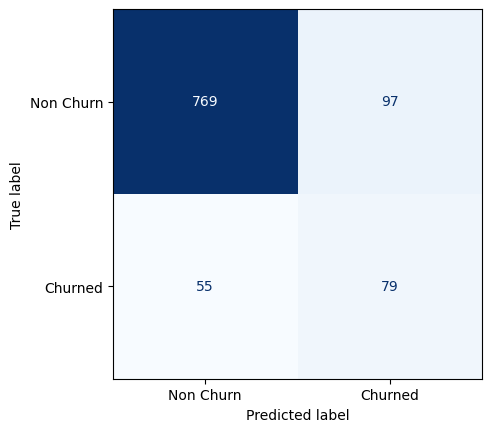

In [29]:
pipe_lr_best = make_pipeline(preprocessor, LogisticRegression(C=0.1, class_weight={0:1, 1:3}))
pipe_lr_best.fit(X_train, y_train)
disp = ConfusionMatrixDisplay.from_estimator(
    pipe_lr_best,
    X_test,
    y_test,
    display_labels=["Non Churn", "Churned"],
    values_format="d",
    cmap=plt.cm.Blues,
    colorbar=False,
)

#### 1 - Precision-recall curve

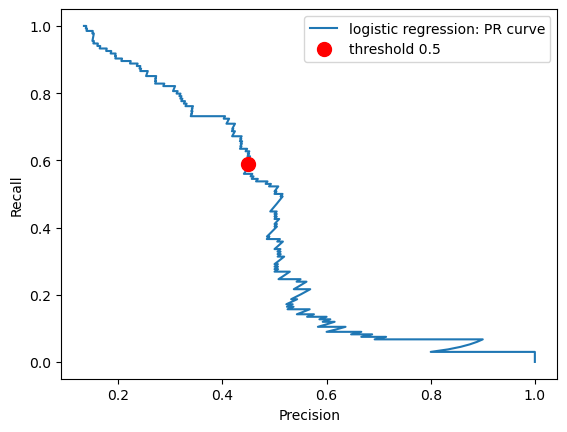

In [30]:
precision, recall, thresholds = precision_recall_curve(
    y_test, pipe_lr_best.predict_proba(X_test)[:, 1]
)
plt.plot(precision, recall, label="logistic regression: PR curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.plot(
    precision_score(y_test, pipe_lr_best.predict(X_test)),
    recall_score(y_test, pipe_lr_best.predict(X_test)),
    "or",
    markersize=10,
    label="threshold 0.5",
)
plt.legend(loc="best")

#### Calculate AP Score

In [31]:
ap_lr = average_precision_score(y_test, pipe_lr_best.predict_proba(X_test)[:, 1])
print("Average precision of logistic regression: {:.3f}".format(ap_lr))

Average precision of logistic regression: 0.465


#### ROC Curve

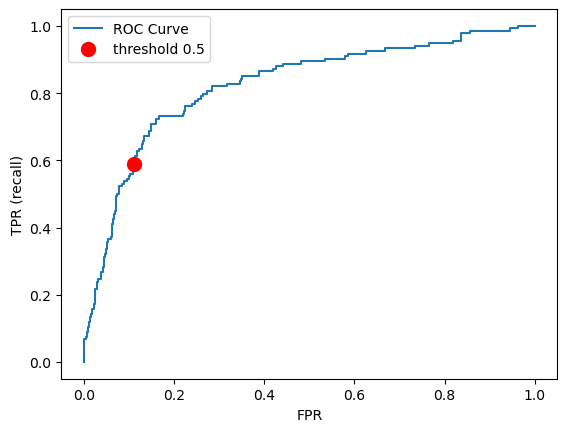

In [32]:
fpr, tpr, thresholds = roc_curve(y_test, pipe_lr_best.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

default_threshold = np.argmin(np.abs(thresholds - 0.5))

plt.plot(
    fpr[default_threshold],
    tpr[default_threshold],
    "or",
    markersize=10,
    label="threshold 0.5",
)
plt.legend(loc="best")

#### AUC Score

In [33]:
roc_lr = roc_auc_score(y_test, pipe_lr_best.predict_proba(X_test)[:, 1])
print("AUC for LR: {:.3f}".format(roc_lr))

AUC for LR: 0.824


#### Comment on AUC Score
**ANSWER:**

2. The `AUC score` evaluates the probability that a randomly picked positive (churned) customer is ranked more positively (more confident that the customer has churned) than a randomly picked negative (non-churned) customer. Our `AUC score` of $0.824$ indicates our models predicts that a majority of our churned customers are more confidently positive (ranked positively) than the majority of our non-churned customers which means our model is performing well.

<br><br><br><br>

### Exercise 3: Regression metrics <a name="3"></a>
<hr> 


For this exercise, we'll use [California housing dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html) from `sklearn datasets`. The code below loads the dataset.  

In [34]:
from sklearn.datasets import fetch_california_housing

housing_df = fetch_california_housing(as_frame=True).frame

### 3.1: Data spitting and exploration 
rubric={points:4}

**Your tasks:**

1. Split the data into train (75%) and test (25%) splits. 
2. Explore the train split. Do you need to apply any transformations on the data? If yes, create a preprocessor with the appropriate transformations. 
3. Separate `X` and `y` to train and test splits. 

#### 1 + 3 Splitting Data

In [35]:
train_df, test_df = train_test_split(housing_df, test_size=0.25, random_state=123)
X_train = train_df.drop(columns=["MedHouseVal"])
X_test = test_df.drop(columns=["MedHouseVal"])

y_train = train_df["MedHouseVal"]
y_test = test_df["MedHouseVal"]

#### EDA

In [36]:
train_df.shape

(15480, 9)

In [37]:
train_df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [38]:
train_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
19995,1.0349,6.0,4.165217,0.982609,734.0,3.191304,36.19,-119.35,0.678
17889,4.7625,13.0,5.265207,1.002433,1087.0,2.644769,37.41,-121.95,1.375
1977,3.5192,9.0,8.747475,1.845118,796.0,2.680135,38.61,-120.44,0.980
6861,2.8672,30.0,4.635616,1.090411,1130.0,3.095890,34.06,-118.13,1.985
11247,4.1276,13.0,4.429936,0.963376,1749.0,2.785032,33.81,-118.00,1.538


In [39]:
# No missing values, total 15480
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15480 entries, 19995 to 19966
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       15480 non-null  float64
 1   HouseAge     15480 non-null  float64
 2   AveRooms     15480 non-null  float64
 3   AveBedrms    15480 non-null  float64
 4   Population   15480 non-null  float64
 5   AveOccup     15480 non-null  float64
 6   Latitude     15480 non-null  float64
 7   Longitude    15480 non-null  float64
 8   MedHouseVal  15480 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [40]:
# all features are numeric -> Scaling
train_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,15480.000000,15480.000000,15480.000000,15480.000000,15480.000000,15480.000000,15480.000000,15480.000000,15480.000000
mean,3.875935,28.550000,5.421818,1.095860,1437.431137,3.073942,35.626601,-119.568380,2.074085
std,1.900729,12.546577,2.519280,0.492851,1131.575270,10.971330,2.135537,2.001982,1.156051
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.750000,32.540000,-124.350000,0.149990
25%,2.562500,18.000000,4.433750,1.005778,791.000000,2.429227,33.930000,-121.800000,1.203000
50%,3.534300,29.000000,5.228714,1.048412,1173.000000,2.815468,34.250000,-118.490000,1.805000
75%,4.750375,37.000000,6.047297,1.099043,1742.000000,3.278071,37.710000,-118.010000,2.655000
max,15.000100,52.000000,141.909091,34.066667,28566.000000,1243.333333,41.950000,-114.310000,5.000010


#### 2 Preprocessing

**ANSWER:**
There are no missing values in our dataset. Additionally, all values are numeric with different scales so we must apply standardization. Because this is the only transformation and our data set is all numeric, we don't need a column transformer.

In [41]:
preprocessor = StandardScaler()
X_train_enc = pd.DataFrame(
    preprocessor.fit_transform(X_train), index=X_train.index, columns=X_train.columns
    )
X_test_enc = pd.DataFrame(
    preprocessor.transform(X_test), index=X_test.index, columns=X_test.columns
    )


In [42]:
X_train_enc.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
19995,-1.494756,-1.797361,-0.498810,-0.229795,-0.621659,0.010697,0.263829,0.109086
17889,0.466449,-1.239422,-0.062167,-0.189570,-0.309694,-0.039119,0.835132,-1.189669
1977,-0.187689,-1.558244,1.320125,1.520300,-0.566866,-0.035895,1.397070,-0.435392
6861,-0.530727,0.115573,-0.312084,-0.011056,-0.271693,0.002001,-0.733610,0.718501
11247,0.132409,-1.239422,-0.393729,-0.268820,0.275350,-0.026334,-0.850681,0.783439


<br><br>

### 3.2 Baseline: Linear Regression 
rubric={points:2}

**Your tasks:**
1. Carry out cross-validation using `sklearn.linear_model.LinearRegression` with default scoring. 
2. What metric is used for scoring by default? 

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
pipe_lr = make_pipeline(preprocessor, LinearRegression())
scores = cross_validate(pipe_lr, X_train, y_train, return_train_score=True)
pd.DataFrame(scores)

,fit_time,score_time,test_score,train_score
0,0.017970,0.004593,0.608602,0.603298
1,0.005749,0.001230,0.599240,0.607080
2,0.004931,0.000655,0.616816,0.602606
3,0.003939,0.000564,0.592949,0.607928
4,0.003777,0.000741,0.015128,0.612855


In [45]:
pd.DataFrame(pd.DataFrame(scores).mean())

,0
fit_time,0.007273
score_time,0.001557
test_score,0.486547
train_score,0.606753


**ANSWER:**

2. The default method used for scoring is the $R^2$ score

<br><br>

### 3.3 Random Forest Regressor
rubric={points:7}

In this exercise, we are going to use [`RandomForestRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) model which we haven't looked into yet. At this point you should feel comfortable using models with our usual ML workflow even if you don't know the details. We'll talk about `RandomForestRegressor` later in the course.  

The code below defines a custom scorer called `mape_scorer` and creates dictionaries for two model (`models`) and five evaluation metrics (`score_types_reg`). 

**Your tasks:**

1. Using the `models` and the evaluation metrics `score_types_reg` in the code below, carry out cross-validation with each model, by passing the evaluation metrics to `scoring` argument of `cross_validate`. Use a pipeline with the model as an estimator if you are applying any transformations. 
2. Show results as a dataframe. 
3. Interpret the results. How do the models compare to the baseline? Which model seems to be performing well with different metrics? 


In [46]:
models = {
    "Ridge": Ridge(),
    "Random Forest": RandomForestRegressor(),
}

score_types_reg = {
    "neg_mean_squared_error": "neg_mean_squared_error",
    "neg_root_mean_squared_error": "neg_root_mean_squared_error",
    "neg_mean_absolute_error": "neg_mean_absolute_error",
    "r2": "r2",
    "neg_mean_absolute_percentage_error": "neg_mean_absolute_percentage_error",
}

#### 1. cross validation with each model

In [47]:
res_dict = {
    "models": models.keys(),
    "test_mean_neg_mse": list(),
    "train_mean_neg_mse": list(),
    "test_mean_neg_rmse": list(),
    "train_mean_neg_rmse": list(),
    "test_mean_neg_mean_absolute_error": list(),
    "train_mean_neg_mean_absolute_error": list(),
    "test_mean_r2": list(),
    "train_mean_r2": list(),
    "test_mean_neg_mape": list(),
    "train_mean_neg_mape": list(),
}

for m in res_dict['models']:
    pipe = make_pipeline(preprocessor, models[m])
    scores = cross_validate(
        pipe, X_train, y_train, return_train_score=True, scoring=score_types_reg
        )
    res_dict["test_mean_neg_mse"].append(scores['test_neg_mean_squared_error'].mean())
    res_dict["train_mean_neg_mse"].append(scores['train_neg_mean_squared_error'].mean())
    res_dict["test_mean_neg_rmse"].append(scores['test_neg_root_mean_squared_error'].mean())
    res_dict["train_mean_neg_rmse"].append(scores['train_neg_root_mean_squared_error'].mean())
    res_dict["test_mean_neg_mean_absolute_error"].append(scores['test_neg_mean_absolute_error'].mean())
    res_dict["train_mean_neg_mean_absolute_error"].append(scores['train_neg_mean_absolute_error'].mean())
    res_dict["test_mean_r2"].append(scores['test_r2'].mean())
    res_dict["train_mean_r2"].append(scores['train_r2'].mean())
    res_dict["test_mean_neg_mape"].append(scores['test_neg_mean_absolute_percentage_error'].mean())
    res_dict["train_mean_neg_mape"].append(scores['train_neg_mean_absolute_percentage_error'].mean())

results = pd.DataFrame(res_dict)

#### 2. Show as frame

In [48]:
results.T

,0,1
models,Ridge,Random Forest
test_mean_neg_mse,-0.678763,-0.268434
train_mean_neg_mse,-0.525484,-0.037726
test_mean_neg_rmse,-0.808948,-0.517994
train_mean_neg_rmse,-0.7249,-0.194225
test_mean_neg_mean_absolute_error,-0.536109,-0.338477
train_mean_neg_mean_absolute_error,-0.531897,-0.126466
test_mean_r2,0.486522,0.798816
train_mean_r2,0.606753,0.971765
test_mean_neg_mape,-0.319265,-0.191235


#### 3. Interpretation

For each of these metrics: `neg_mse`, `neg_rmse`, `mean_absolute_error`, and `neg_mape` we want a higher score (more positive or closer to 0) because a lower magnitude of these scores is better. For $R^2$ we would like a higher score.

In comparison to the $R^2$ score of the baseline `Linear Regression` model, the `Ridge` model performs similarly to the baseline both with validation $R^2\approx 0.486$. However, the `Random Forest` model performs significantly better than the baseline with a validation %R^2=0.799$

According to all of the metrics we are using, `Random forest` seems to perform better than `Ridge`. All of the scoring metrics have higher values for the `Random forest` model.

<br><br>

### 3.4 Hyperparameter optimization 
rubric={points:1}

1. Carry out hyperparameter optimization using `RandomizedSearchCV` and `Ridge` with the following `param_dist`. The `alpha` hyperparameter of `Ridge` controls the fundamental tradeoff. Choose `neg_mean_absolute_percentage_error` as the HParam optimization metric.

2. What was the best `alpha` hyper-parameter found?

In [49]:
from scipy.stats import loguniform

param_dist = {"ridge__alpha": loguniform(1e-3, 1e3)}

In [50]:
pipe_ridge = make_pipeline(preprocessor, Ridge())

random_search = RandomizedSearchCV(
    pipe_ridge, param_distributions=param_dist, n_jobs=-1, n_iter=20, cv=5, random_state=42, scoring='neg_mean_absolute_percentage_error'
)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('ridge', Ridge())]),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'ridge__alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x160e277c0>},
                   random_state=42,
                   scoring='neg_mean_absolute_percentage_error')

In [51]:
print(f'best score: {random_search.best_score_}')
print(f'best param: {random_search.best_params_}')

best score: -0.31912256083232415
best param: {'ridge__alpha': 24.658329458549098}


The best `alpha = 24.658`

<br><br>

### 3.5 Test results
rubric={points:4}

**Your tasks:**

Test the best model (from 3.4) on the test set based on the `neg_mean_absolute_percentage_error` score.

In [52]:
from sklearn.metrics import mean_absolute_percentage_error

In [53]:
pipe_best_ridge = make_pipeline(preprocessor, Ridge(alpha=24.658))
pipe_best_ridge.fit(X_train, y_train)
y_pred = pipe_best_ridge.predict(X_test)
best_ridge_mape = -1 * mean_absolute_percentage_error(y_test, y_pred)
best_ridge_mape

-0.31622866932971816

<br><br>

### 3.6 Model interpretation  
rubric={points:4}

Ridge is a linear model and it learns coefficients associated with each feature during `fit()`. 

**Your tasks:**

1. Explore coefficients learned by the `Ridge` model above as a pandas dataframe with two columns: 
   - features 
   - coefficients
2. Increasing which feature values would result in higher housing price? 

In [54]:
# Adapted from Lecture 10
df = pd.DataFrame(
    data={
        "features": X_train.columns,
        "coefficients": pipe_best_ridge.named_steps["ridge"].coef_,
    }
)

df.sort_values("coefficients",ascending=False)

,features,coefficients
0,MedInc,0.834305
3,AveBedrms,0.307090
1,HouseAge,0.119846
4,Population,-0.002463
5,AveOccup,-0.042213
2,AveRooms,-0.271125
7,Longitude,-0.844381
6,Latitude,-0.874981


**ANSWER:**

Increasing the `MedInc`, `AveBedrms`, and `HouseAge` features would result in higher housing prices according to the coefficients learned by my `Ridge` model.

<br><br>

## Submission instructions 

**PLEASE READ:** When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from “1” will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 